In [39]:
#데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, precision_score, \
recall_score, cohen_kappa_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = 999
pd.options.display.max_rows = 50

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
events = pd.read_csv('C:/Users/Owner/Desktop/git/Advertising/축구/Football Events/events.csv')
info = pd.read_csv('C:/Users/Owner/Desktop/git/Advertising/축구/Football Events/ginf.csv')

In [4]:
events = events.merge(info[['id_odsp', 'country', 'date']], on='id_odsp', how='left') #리그/국가 및 날짜와 같은 ginf.csv의 유용한 정보를 이벤트에 추가

In [5]:
extract_year = lambda x: datetime.strptime(x,"%Y-%m-%d").year
events['year'] = [extract_year(x) for key, x in enumerate(events['date'])]

In [6]:
shots = events[events.event_type==1]
shots['player'] = shots['player'].str.title()
shots['player2'] = shots['player2'].str.title()
shots['country'] = shots['country'].str.title()

C:\Users\Owner\AppData\Local\Temp\ipykernel_13720\2764275298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player'] = shots['player'].str.title()
C:\Users\Owner\AppData\Local\Temp\ipykernel_13720\2764275298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player2'] = shots['player2'].str.title()
C:\Users\Owner\AppData\Local\Temp\ipykernel_13720\2764275298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [7]:
pie = shots[['shot_outcome', 'id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event': 'count'})

In [8]:
pie.shot_outcome = pie.shot_outcome.astype(int)
pie.shot_outcome = pie.shot_outcome.replace({1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'})

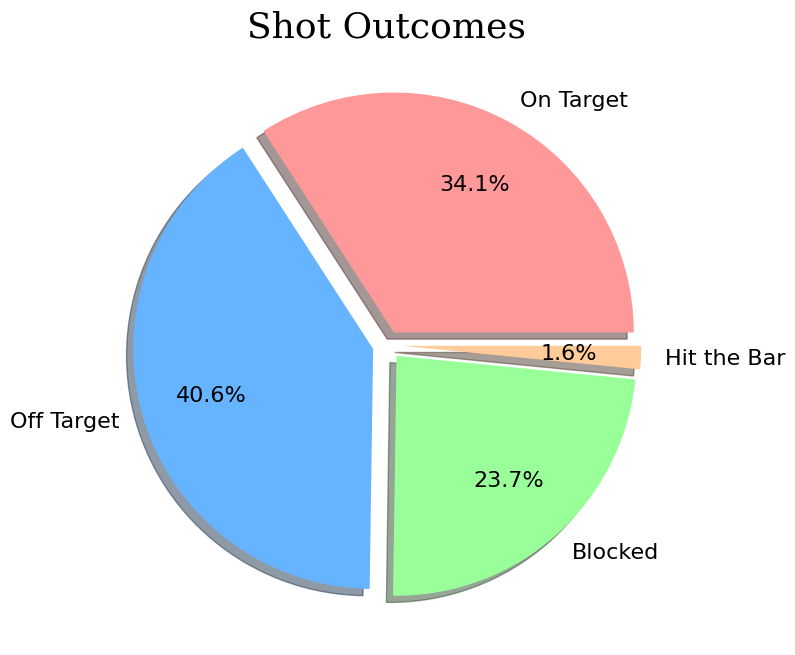

In [9]:
fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=pie['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Shot Outcomes", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

In [10]:
bar = shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
bar.shot_place = bar.shot_place.astype(int)
bar.shot_place = bar.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

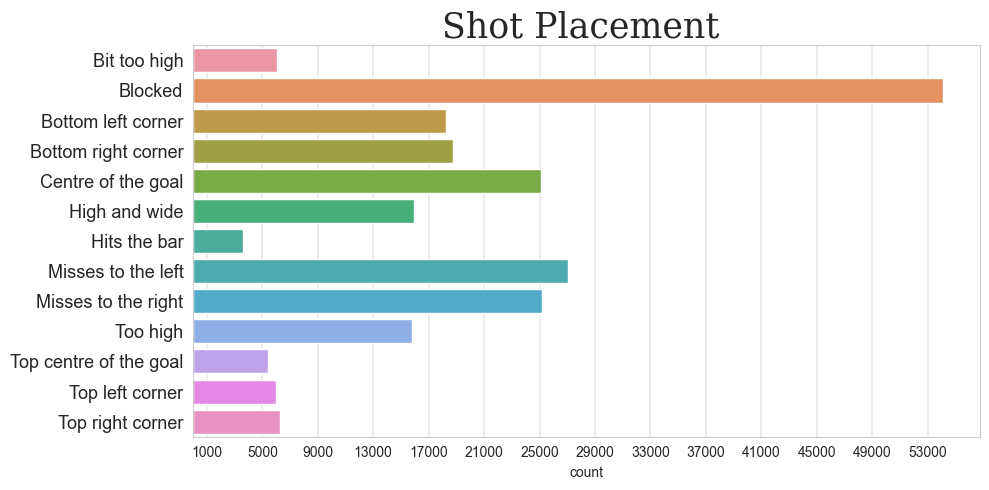

In [11]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[10,5])
labels = bar['shot_place']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(x=bar['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,57000,4000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement ", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [12]:
goals  = shots[['is_goal', 'id_event', 'country']].groupby(['is_goal', 'country']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [13]:
goals['percentage']=0
for i in range(len(goals)):
    for country in goals.country.unique():
        if goals.iloc[i,goals.columns.get_loc("country")]==country:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.country==country]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

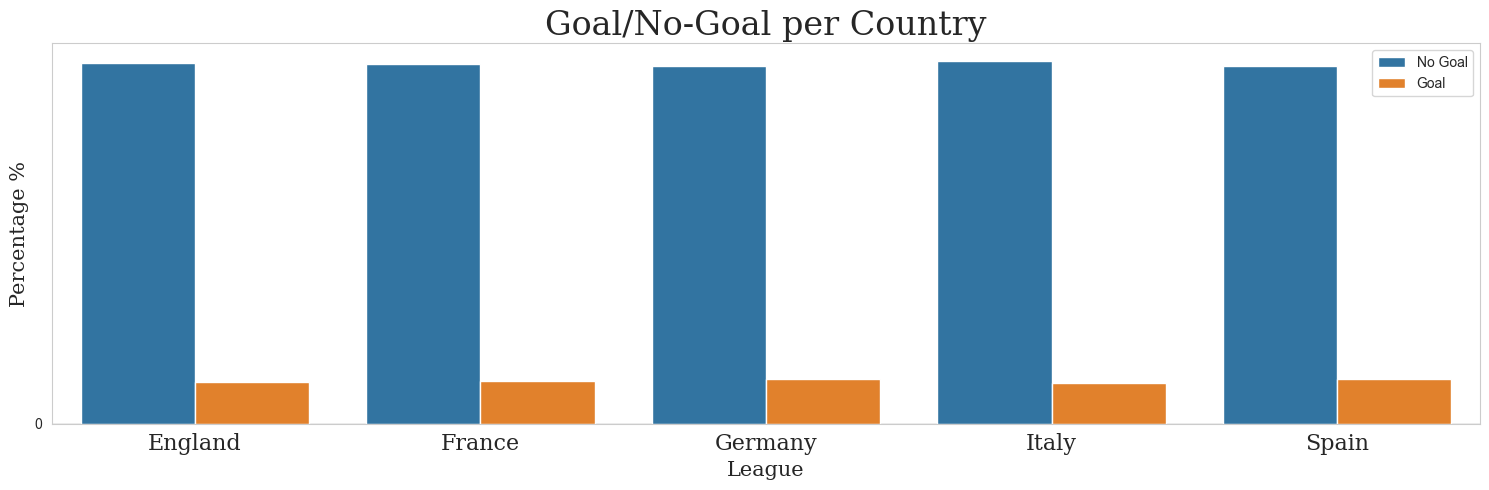

In [14]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[15,5])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='country')

ax.set_yticks(np.arange(0,10,10))

ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='League', fontsize=15, fontfamily='serif')

ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per Country", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=10)
#how_values_on_bars(ax) #구체적인 %가 안 나옴 
plt.show()

In [15]:
goals  = shots[['is_goal', 'id_event', 'year']].groupby(['is_goal', 'year']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [16]:
goals['percentage']=0
for i in range(len(goals)):
    for year in goals.year.unique():
        if goals.iloc[i,goals.columns.get_loc("year")]==year:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.year==year]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

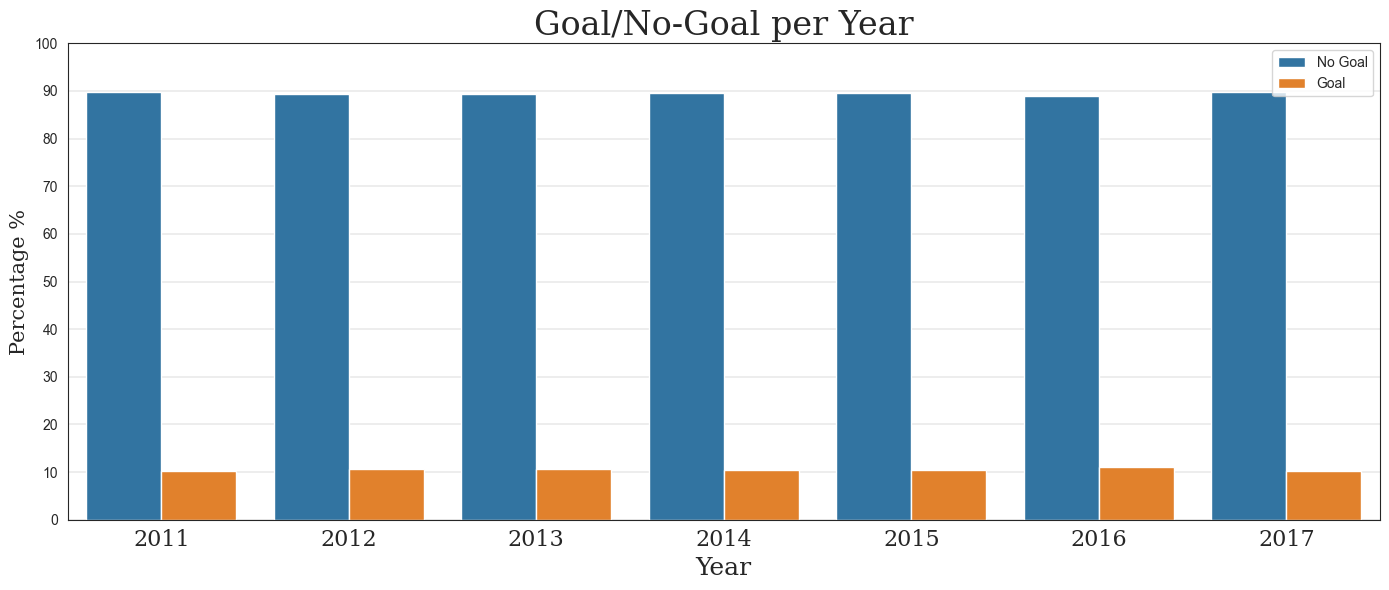

In [17]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='year')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='Year', fontsize=18, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per Year", fontsize=20, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=10)
#show_values_on_bars(ax)
plt.show()

In [18]:
# xG 모델 학습

In [19]:
data = pd.get_dummies(shots.iloc[:,-8:-3], columns=['location', 'bodypart','assist_method', 'situation'])
data.columns = ['fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right',
                'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range',
                'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 
                'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header',
                'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
data['is_goal'] = shots['is_goal']

In [20]:
print(len(data))
print(data.is_goal.sum())
print(len(data.columns)-1)

229135
24441
28


In [21]:
#총 229,135개의 슛이 있었고 그중 24,441개가 골이 되었다. 각 슛을 설명하는 28개의 다른 특성을 가지고 있다. 이 28개의 특성은 모두 이진법이므로 슛의 특성에 대해서는 그저 골 또는 노골만을 표시할 했을 뿐이다.

#이제 트레이닝과 테스트를 위해 X와 y 두 개의 서로 다른 집합으로 나눌 것이다. 그것들 중 65%를 우리 모델의 훈련에 사용하고 35%를 시험에 사용할 것이다. 왜냐하면 우리는 충분한 데이터 포인트를 가지고 있기 때문에 65%는 그것을 적절하게 훈련시키기에 충분할 것이다. 

In [22]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [23]:
#우선 매우 강력한 알고리즘인 그래디언트 부스팅 분류기를 훈련시킬 것이다. 그것은 의사결정 나무의 앙상블로 구성된다. 이 트리들은 훈련 데이터에 과적합되는 경향이 있기 때문에 매번 다른 예측 변수와 표본을 사용하여 수천 개의 다른 트리를 개발하는 것은 유명한 편향 대 분산 트레이드오프 내에서 예측의 분산을 줄이는 데 도움이 된다.

#모형을 조정하는 데 가장 좋은 하이퍼파라미터를 학습하기 위해 하이퍼옵트를 사용한다. 이런 방식으로 모형에 가장 적합한 매개변수를 결정하려는 어떤 지능(사실은 다른 알고리즘)이 있기 때문에 일반적인 그리드 검색보다 하이퍼옵트가 더 낫다고 판단했다.

In [24]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def evaluate_model(params): 
    model = GradientBoostingClassifier(
                        learning_rate=params['learning_rate'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_depth = params['max_depth'],
                        max_features = params['max_features']
                        )

    model.fit(X_train, y_train)
    return {
        'learning_rate': params['learning_rate'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_depth': params['max_depth'],
        'max_features': params['max_features'],
        'train_ROCAUC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        'test_ROCAUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        'recall': recall_score(y_test, model.predict(X_test)),
        'precision': precision_score(y_test, model.predict(X_test)),
        'f1_score': f1_score(y_test, model.predict(X_test)),
        'train_accuracy': model.score(X_train, y_train),
        'test_accuracy': model.score(X_test, y_test),
    }

def objective(params):
    res = evaluate_model(params)
    
    res['loss'] = - res['test_ROCAUC'] 
    res['status'] = STATUS_OK 
    return res 

hyperparameter_space = {
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(15, 200)),
        'max_depth': hp.choice('max_depth', range(2, 20)),
        'max_features': hp.choice('max_features', range(3, 27))
}

In [25]:
trials = Trials()
fmin(
    objective,
    space=hyperparameter_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
);

100%|███████████████████████████████████████████████| 50/50 [36:45<00:00, 44.11s/trial, best loss: -0.8193847251571768]


In [26]:
pd.DataFrame(trials.results).sort_values(by='f1_score', ascending=False).head(5)

,learning_rate,min_samples_leaf,max_depth,max_features,train_ROCAUC,test_ROCAUC,recall,precision,f1_score,train_accuracy,test_accuracy,loss,status
44,0.083819,29,17,25,0.819070,0.818312,0.269167,0.710870,0.390481,0.910566,0.910896,-0.818312,ok
33,0.050727,15,18,19,0.819143,0.818343,0.268815,0.710158,0.390003,0.910566,0.910833,-0.818343,ok
38,0.171177,54,16,20,0.819051,0.818285,0.268579,0.711526,0.389961,0.910580,0.910896,-0.818285,ok
34,0.283140,119,14,5,0.818593,0.818816,0.268109,0.714510,0.389910,0.910492,0.911033,-0.818816,ok
29,0.140484,18,10,3,0.818841,0.818559,0.268344,0.711790,0.389752,0.910553,0.910896,-0.818559,ok


In [27]:
#모수들에 대해 다른 값을 시도할 때 큰 차이가 없는 것처럼 보이지만 위의 극한 모수들로 가장 좋은 결과를 얻는다. 우리의 예측이 훈련과 시험 예제에서 똑같이 좋기 때문에 과적합의 징후가 전혀 없다는 것은 좋은 일이다.

In [28]:
model = GradientBoostingClassifier(
                        learning_rate=0.285508,
                        min_samples_leaf=99,
                        max_depth = 19,
                        max_features = 7
                        )
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.285508, max_depth=19, max_features=7,
                           min_samples_leaf=99)

In [29]:
print('The test set contains {} examples (shots) of which {} are positive (goals).'.format(len(y_test), y_test.sum()))
print('The accuracy of classifying whether a shot is goal or not is {}%.'.format(round(model.score(X_test, y_test)*100),2))
print('Our classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100),2))

The test set contains 80198 examples (shots) of which 8504 are positive (goals).
The accuracy of classifying whether a shot is goal or not is 91%.
Our classifier obtains an ROC-AUC of 82%


In [30]:
#xG 모델이 슛이 목표인지 아닌지를 91% 정확하게 예측할 수 있음을 알 수 있다. 게다가 82%의 꽤 좋은 ROC-AUC 메트릭을 얻는다. 이것은 매우 유망해 보인다.

#그러나 이 두 개의 메트릭은 우리의 데이터 세트가 고도로 불균형하다는 것을 고려하지 않는다. 결국 목표가 되지 않는 샷이 목표가 되는 샷보다 훨씬 더 많다. 따라서 예를 들어 단순히 한 번, 한 번도 빠짐없이 샷이 목표가 되지 않을 것이라고 예측한다면 이미 89%의 정확도를 얻을 수 있다.

#이제 우리는 PR-AUC(Precision-Recall Under the Curve)와 코헨의 카파 통계량에 대해 알아보도록 하겠다. 이 둘은 자료의 불균형을 고려하기 때문에 우리의 경우에 더 적합하다.

In [31]:
print('The baseline performance for PR-AUC is {}%. This is the PR-AUC that what we would get by random guessing.'.format(round(y_train.mean(),2)))
print('Our model obtains an PR-AUC of {}%.'.format(round(average_precision_score(y_test, model.predict_proba(X_test)[:, 1])*100,2)))
print('Our classifier obtains a Cohen Kappa of {}.'.format(round(cohen_kappa_score(y_test,model.predict(X_test)),2)))

The baseline performance for PR-AUC is 0.11%. This is the PR-AUC that what we would get by random guessing.
Our model obtains an PR-AUC of 47.36%.
Our classifier obtains a Cohen Kappa of 0.35.


In [32]:
print(color.BOLD + color.YELLOW + 'Confusion Matrix:\n' + color.END)
print(confusion_matrix(y_test,model.predict(X_test)))
print(color.BOLD +  color.YELLOW + '\n Report:' + color.END)
print(classification_report(y_test,model.predict(X_test)))

Confusion Matrix:

[[70787   907]
 [ 6226  2278]]

 Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.72      0.27      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



In [33]:
#혼동 행렬은 모든 예측을 요약한 것이다. 이것은 우리의 모델이 목표가 아닌 모든 슛을 시도에서 70,781개를 정확히 노골로 식별하고 6,238개의 슛이 골이 아닐 것이라고 예측했고, 실제로도 그랬다는 것을 보여준다. 
#다른 열에서 913개의 골을 정확하게 예측했지만 2266개의 성공적인 슛을 골로 예측하지 못 했다는 것을 알 수 있다.

#보고서를 통해 모델이 클래스 0(목표 없음)을 예측할 때 우수한 수치를 가지고 있지만 클래스 1(목표)을 예측하는 데는 그다지 좋지 않은 수치를 보이고 있었다. 후자의 경우 정밀도는 71%이고 리콜은 27%이며 F1 점수는 0.39이다. 이는 괜찮은 수치이긴 하지만 실제로는 좋은 수치가 아니다. 


In [34]:
model = GradientBoostingClassifier(
                        learning_rate=0.285508,
                        min_samples_leaf=99,
                        max_depth = 19,
                        max_features = 7
                        )
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.285508, max_depth=19, max_features=7,
                           min_samples_leaf=99)

In [35]:
#선수들의 슛이 어느 곳에 차야할지 여부를 결정하는 데 어느 곳이 적합할까?

In [36]:
import eli5
eli5.explain_weights(model, feature_names=list(X_train.columns))

Weight,Feature
0.1926 ± 0.1320,close_range
0.1762 ± 0.0813,not_recorded
0.1501 ± 0.1172,outside_box
0.0990 ± 0.2080,loc_centre_box
0.0971 ± 0.0825,set_piece
0.0616 ± 0.1621,fast_break
0.0482 ± 0.0638,penalty
0.0346 ± 0.0410,assist_through_ball
0.0204 ± 0.1244,right_foot
0.0139 ± 0.0423,left_side_6ybox


In [37]:
#예상대로 대부분의 슛 위치 단서(근거리, 박스 중앙, 박스 외부)가 가장 관련성이 높은 것을 볼 수 있다. 한 가지 걱정해야 할 것은 위치=not_ recorded의 높은 계수이다. 분명히 위치가 기록되지 않은 슛들이 있고, 어떤 이유에서인지 이러한 슛들이 골이 될 가능성이 매우 높다.

In [38]:
#선수들에 대한 분석
#선수들의 분석 원본 데이터의 각 슛에 예상 목표에 대해 가지고 있는 정보를 추가하는 것으로 시작할 것이다. 이로써 선수들에 대한 많은 흥미로운 메트릭을 추출할 수 있으며, 이 모든 메트릭은 각 슛에 대한 새로운 xG 예측과 어떤 식으로든 관련되어 있다.

In [39]:
shots['prediction'] = model.predict_proba(X)[:, 1]
shots['difference'] = shots['prediction'] - shots['is_goal']

C:\Users\Owner\AppData\Local\Temp\ipykernel_13720\3778964094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['prediction'] = model.predict_proba(X)[:, 1]
C:\Users\Owner\AppData\Local\Temp\ipykernel_13720\3778964094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['difference'] = shots['prediction'] - shots['is_goal']


In [40]:
#어떤 선수들이 가장 마무리를 잘할까?

In [41]:
players = shots.groupby('player').sum().reset_index()
players.rename(columns={'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
players.expectedGoals = round(players.expectedGoals,2)
players.difference = round(players.difference,2)
players['ratio'] = players['trueGoals'] / players['expectedGoals']

In [42]:
print(round(players.expectedGoals.corr(players.trueGoals),3)) #위에서 언급한 바와 같이, 우리의 목표와 기대되는 목표 사이의 상관관계가 매우 높다는 것을 알 수 있으며, 이는 xG 모델에 대해 잘 말해준다

0.977


In [43]:
#Best Finishers

show = players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'difference', 'trueGoals', 'expectedGoals']].head(10)
show.head(5)

,rank,player,difference,trueGoals,expectedGoals
0,1,Lionel Messi,-58.92,205,146.08
1,2,Zlatan Ibrahimovic,-33.83,153,119.17
2,3,Cristiano Ronaldo,-32.27,198,165.73
3,4,Luis Suarez,-31.77,96,64.23
4,5,Gonzalo Higuain,-31.68,118,86.32


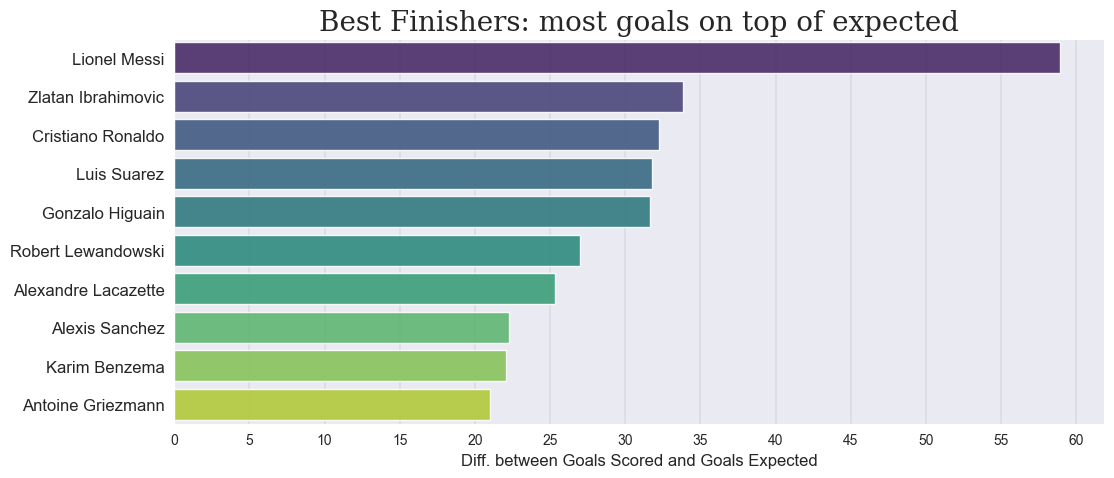

In [44]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=abs(show['difference']), y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,65,5))
ax.set_xlabel(xlabel='Diff. between Goals Scored and Goals Expected', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Finishers: most goals on top of expected", fontsize=20, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, alpha=0.8, axis='x')
plt.show()

In [45]:
#단연코 일등 메시... 이어서 즐라탄 이브라히모비치, 크리스티아누 호날두, 곤살로 이과인, 루이스 수아레스, 로베르토 레반도프스키, 알렉산드로 라카제트, 알렉시스 산체스, 카림 벤제마, 앙토니 그리즈만 순이다.

In [46]:
show = players[players['trueGoals']>30].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'ratio', 'trueGoals', 'expectedGoals']].head(10)
show.head(5)

,rank,player,ratio,trueGoals,expectedGoals
0,1,Franck Ribery,1.897533,40,21.08
1,2,Mario Gotze,1.591398,37,23.25
2,3,Bas Dost,1.550388,36,23.22
3,4,Heungmin Son,1.518027,32,21.08
4,5,Luis Suarez,1.494629,96,64.23


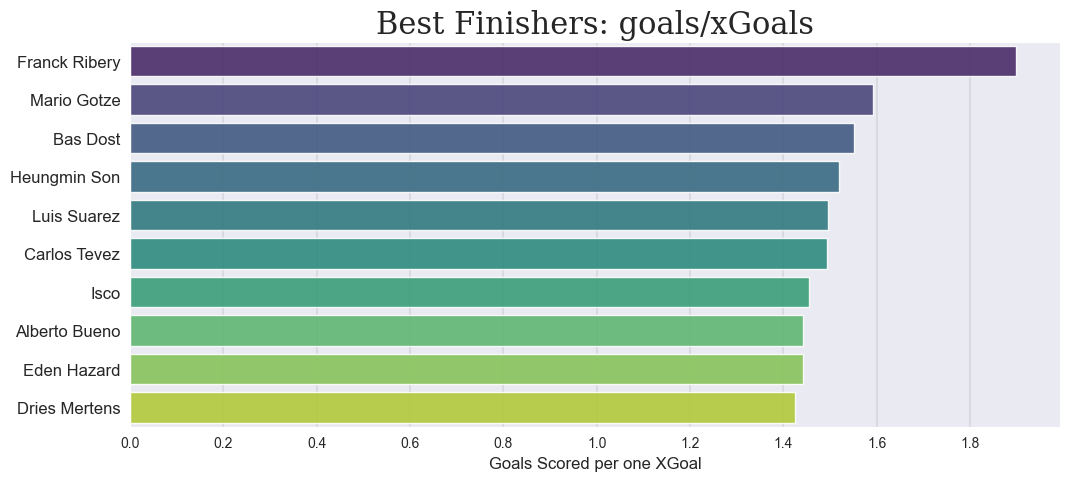

In [47]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,1.9,0.2))
ax.set_xlabel(xlabel='Goals Scored per one XGoal', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Finishers: goals/xGoals", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [48]:
#리베리가 경기에서 가장 많이 골을 넣은 선수에 위치한다. 슛을 실행했다면 그 선수가 몇 골을 넣었을 것인지에 비해 그 선수가 득점한 골의 비율에 해당한다. 리베리의 경우, 그가 슛의 수와 맥락에 따라 득점하기로 되어 있는 각 골로부터, 그는 거의 2골을 넣었다.

In [49]:
#리그당 연간 최고의 마무리 선수

In [50]:
players_per_year = shots.groupby(['year', 'country', 'player']).sum().reset_index()
players_per_year.rename(columns={'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
players_per_year.expectedGoals = round(players_per_year.expectedGoals,2)
players_per_year.difference = round(players_per_year.difference,2)
players_per_year['ratio'] = players_per_year['trueGoals'] / players_per_year['expectedGoals']
players_per_year['ratio'] = round(players_per_year.ratio, 2)

In [51]:
def best_finishers_per_year(years, leagues, min_goals, df):
    years_res=[]; leagues_res=[]; players_res=[]; ratio_res=[]; goals=[]
    players_per_year = df[df['trueGoals']>min_goals]
    for league in leagues:
        for year in years:
            results = players_per_year[(players_per_year['year']==year) & (players_per_year['country']==league)].sort_values(by='ratio', ascending=False).reset_index(drop=True)
            results['rank'] = results.index + 1
            if len(results)>0:
                years_res.append(year)
                leagues_res.append(league)
                players_res.append(results[results['rank']==1]['player'].iloc[0])
                ratio_res.append(results[results['rank']==1]['ratio'].iloc[0])
                goals.append(results[results['rank']==1]['trueGoals'].iloc[0])
    return years_res, leagues_res, players_res, ratio_res, goals

In [52]:
years, leagues, players_res, ratio, goals = best_finishers_per_year(years = players_per_year.year.unique(), leagues=players_per_year.country.unique(),\
                       min_goals=12, df=players_per_year)

In [53]:
results_perYear = pd.DataFrame()
results_perYear['League']=leagues
results_perYear['Year']=years
results_perYear['bestFinisher']=players_res
results_perYear['Goals']=goals
results_perYear['Goals/xGoals Ratio']=ratio
results_perYear

,League,Year,bestFinisher,Goals,Goals/xGoals Ratio
0,France,2011,Olivier Giroud,13,1.23
1,France,2012,Zlatan Ibrahimovic,18,1.47
2,France,2013,Dario Cvitanich,16,1.70
3,France,2014,Cheick Diabate,13,1.61
4,France,2015,Benjamin Moukandjo,13,1.68
5,France,2016,Zlatan Ibrahimovic,21,2.26
6,Germany,2011,Klaasjan Huntelaar,15,1.76
7,Germany,2012,Martin Harnik,15,1.79
8,Germany,2013,Ivica Olic,13,2.23
9,Germany,2014,Josip Drmic,14,2.03


In [54]:
#최악의 마무리 선수

In [55]:
show = players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'difference', 'trueGoals', 'expectedGoals']].tail(10)
show.tail(3)

,rank,player,difference,trueGoals,expectedGoals
4784,4785,Mats Hummels,8.95,10,18.95
4785,4786,Amauri,11.99,20,31.99
4786,4787,Jesus Navas,14.52,9,23.52


In [56]:
show = players[players['trueGoals']>30].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show.sort_values(by='rank', ascending=False)
show = show[['rank', 'player', 'ratio', 'trueGoals', 'expectedGoals']].head(10)
show.head(3)

,rank,player,ratio,trueGoals,expectedGoals
140,141,Giampaolo Pazzini,0.779286,31,39.78
139,140,Mario Balotelli,0.811908,36,44.34
138,139,Gonzalo Bergessio,0.845608,31,36.66


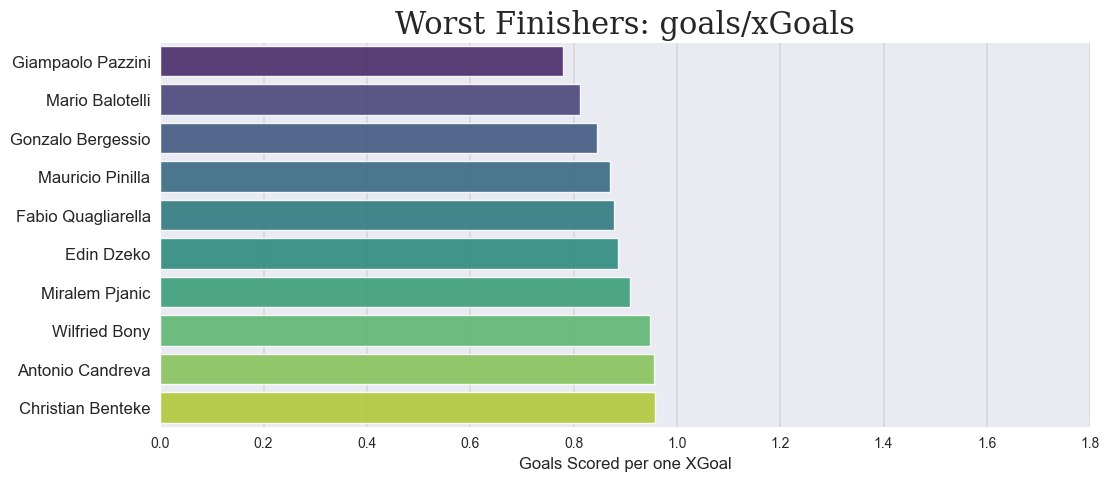

In [57]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,1.9,0.2))
ax.set_xlabel(xlabel='Goals Scored per one XGoal', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Worst Finishers: goals/xGoals", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [58]:
#설명 생략.

In [59]:
#어떤 선수가 가장 많은 골을 넣을까?

In [60]:
show = players[['player', 'trueGoals', 'expectedGoals']].sort_values(['expectedGoals'], ascending=False).head(10)
show.head(5)

,player,trueGoals,expectedGoals
944,Cristiano Ronaldo,198,165.73
2745,Lionel Messi,205,146.08
4779,Zlatan Ibrahimovic,153,119.17
1277,Edinson Cavani,121,113.92
3971,Robert Lewandowski,124,97.03


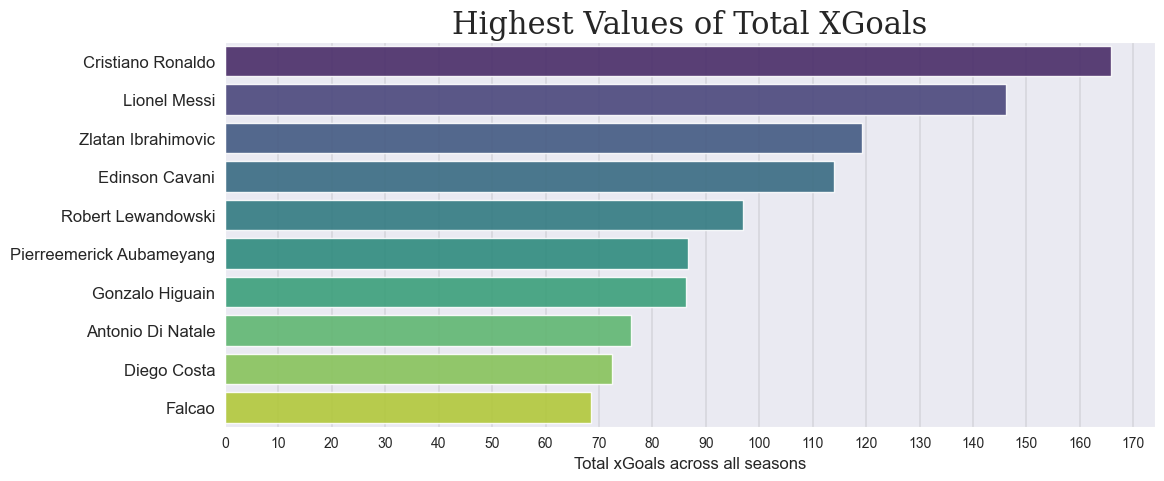

In [61]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['expectedGoals'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,180,10))
ax.set_xlabel(xlabel='Total xGoals across all seasons', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Highest Values of Total XGoals", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [62]:
#어떤 선수들이 가장 골을 못 넣을까?

In [63]:
players.rename(columns={'event_type': 'n_shots'}, inplace=True) ## event_type은 데이터에서 항상 하나이기 때문에, 각 슛의 총 개수로 사용할 수 있다

In [64]:
players['xG_per_shot_ratio'] = players['expectedGoals'] / players['n_shots']
show = players[players['n_shots']>100].sort_values(['xG_per_shot_ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'xG_per_shot_ratio', 'trueGoals', 'expectedGoals', 'difference']].tail(5)

,rank,player,xG_per_shot_ratio,trueGoals,expectedGoals,difference
669,670,Daniel Baier,0.042203,5,7.47,2.47
670,671,Ivan Radovanovic,0.041553,2,6.69,4.69
671,672,Florent Balmont,0.036845,5,6.19,1.19
672,673,Gokhan Inler,0.035676,9,6.60,-2.40
673,674,Tom Huddlestone,0.030463,2,3.29,1.29


In [65]:
show = show[['rank', 'player', 'xG_per_shot_ratio', 'trueGoals', 'expectedGoals', 'difference']].head(10)
show.head(5)

,rank,player,xG_per_shot_ratio,trueGoals,expectedGoals,difference
0,1,Diego Milito,0.208986,33,28.84,-4.16
1,2,Kevin Gameiro,0.193861,63,58.74,-4.26
2,3,Ikechukwu Uche,0.193186,21,21.83,0.83
3,4,Carlos Bacca,0.191348,57,44.01,-12.99
4,5,Miku,0.190826,23,20.80,-2.20


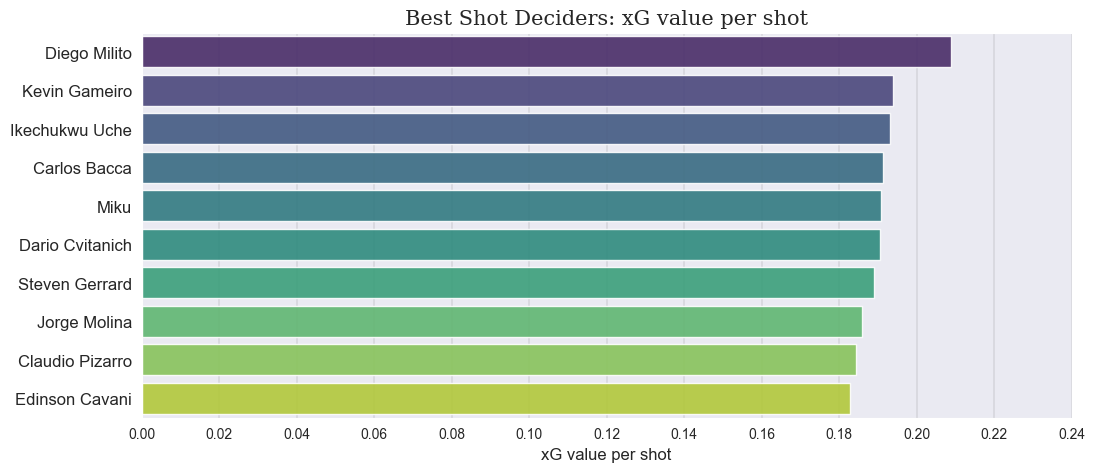

In [66]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['xG_per_shot_ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,0.25,0.02))
ax.set_xlabel(xlabel='xG value per shot', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Shot Deciders: xG value per shot", fontsize=15, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [67]:
#어느 선수가 헤딩을 가장 잘 할까?

In [68]:
headers = shots[(shots.event_type==1) & (shots.bodypart==3)]
headers_players = headers.groupby('player').sum().reset_index()
headers_players.rename(columns={'event_type': 'n_headers', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
headers_players['ratio'] = headers_players['trueGoals'] / headers_players['expectedGoals']
show_headers = headers_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show_headers['rank'] = show_headers.index+1
show_headers[['rank', 'player', 'n_headers', 'trueGoals', 'expectedGoals', 'difference']].head(5)

,rank,player,n_headers,trueGoals,expectedGoals,difference
0,1,Cristiano Ronaldo,159,36,20.062197,-15.937803
1,2,Mario Mandzukic,124,28,14.567367,-13.432633
2,3,Fernando Llorente,141,25,15.952457,-9.047543
3,4,Sloan Privat,86,17,9.917944,-7.082056
4,5,Pierreemerick Aubameyang,59,14,7.364262,-6.635738


In [69]:
#왼발 슈팅이 가장 좋은 선수는 누구일까?

In [70]:
left_foot = shots[(shots.event_type==1) & (shots.bodypart==2)]
left_foot_players = left_foot.groupby('player').sum().reset_index()
left_foot_players.rename(columns={'event_type': 'n_leftFoot_shots', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
show_lfoot = left_foot_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show_lfoot['rank'] = show_lfoot.index+1
show_lfoot[['rank', 'player', 'n_leftFoot_shots', 'trueGoals', 'expectedGoals', 'difference']].head(5)

,rank,player,n_leftFoot_shots,trueGoals,expectedGoals,difference
0,1,Lionel Messi,752,167,121.448742,-45.551258
1,2,Antoine Griezmann,345,58,41.509578,-16.490422
2,3,Arjen Robben,296,42,32.169311,-9.830689
3,4,Iago Falque,132,23,13.268865,-9.731135
4,5,Franck Ribery,57,16,6.449010,-9.550990


In [71]:
show_lfoot[show_lfoot.player=='Cristiano Ronaldo'][['rank', 'player', 'expectedGoals', 'trueGoals']] # 호날두는 과연..?

,rank,player,expectedGoals,trueGoals
78,79,Cristiano Ronaldo,28.33313,32


In [72]:
#메시가 1위다. 슈팅을 둘러싼 특성에 따라 기대했던 것과 비교했을 때 왼발로 가장 많은 골을 넣은 선수다. 앙투안 그리즈만, 이아고 팔케, 아르연 로번으로 명단이 완성됐다. 예상할 수 있듯이 이 선수들은 모두 왼발잡이다.

In [73]:
show_lfoot[show_lfoot.player=='son heungmin'][['rank', 'player', 'expectedGoals', 'trueGoals']] # 손흥인은..?

,rank,player,expectedGoals,trueGoals


In [74]:
#총 값이 아닌 비율을 볼 때 어떤 일이 일어날까?

In [75]:
left_foot_players['ratio'] = left_foot_players['trueGoals'] / left_foot_players['expectedGoals']
show_lfoot = left_foot_players[left_foot_players['trueGoals']>20].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show_lfoot['rank'] = show_lfoot.index+1
show_lfoot[['rank', 'player', 'n_leftFoot_shots', 'trueGoals', 'expectedGoals', 'ratio']].head(5)

,rank,player,n_leftFoot_shots,trueGoals,expectedGoals,ratio
0,1,Iago Falque,132,23,13.268865,1.733381
1,2,Mohamed Salah,129,23,13.936588,1.650332
2,3,Lukas Podolski,132,21,13.191190,1.591972
3,4,James Rodriguez,162,23,15.531943,1.480819
4,5,Zlatan Ibrahimovic,129,25,17.260441,1.448399


In [76]:
#오른발 슈팅을 가장 잘하는 선수는?

In [77]:
right_foot = shots[(shots.event_type==1) & (shots.bodypart==1)]
right_foot_players = right_foot.groupby('player').sum().reset_index()
right_foot_players.rename(columns={'event_type': 'n_rightFoot_shots', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
show = right_foot_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'n_rightFoot_shots', 'trueGoals', 'expectedGoals', 'difference']].head(5)

,rank,player,n_rightFoot_shots,trueGoals,expectedGoals,difference
0,1,Luis Suarez,289,69,43.117208,-25.882792
1,2,Gonzalo Higuain,362,86,60.825210,-25.174790
2,3,Alexandre Lacazette,270,70,48.099742,-21.900258
3,4,Zlatan Ibrahimovic,554,111,90.878294,-20.121706
4,5,Robert Lewandowski,378,84,65.400311,-18.599689


In [78]:
#다시 한번 총 값이 아닌 비율을 확인
right_foot_players['ratio'] = right_foot_players['trueGoals'] / right_foot_players['expectedGoals']
show_rfoot = right_foot_players[right_foot_players['trueGoals']>20].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show_rfoot['rank'] = show_rfoot.index+1
show_rfoot[['rank', 'player', 'n_rightFoot_shots', 'trueGoals', 'expectedGoals', 'ratio']].head(5)

,rank,player,n_rightFoot_shots,trueGoals,expectedGoals,ratio
0,1,Bas Dost,62,23,13.036902,1.764223
1,2,Carlos Tevez,181,33,19.816431,1.665285
2,3,Franck Ribery,165,24,14.428456,1.663380
3,4,Mario Gotze,170,32,19.804718,1.615777
4,5,Lionel Messi,109,30,18.719153,1.602637


In [79]:
right_foot = right_foot_players[right_foot_players['n_rightFoot_shots']>5]
left_foot = left_foot_players[left_foot_players['n_leftFoot_shots']>5]
headers = headers_players[headers_players['n_headers']>5]
all_players = right_foot[['player']].merge(left_foot, on='player', how='inner').merge(headers, on='player', how='inner')                                                                         
all_players_list = list(all_players['player'].unique())

def compare_players(players_list):
    total = right_foot[right_foot['player'].isin(players_list)][['player', 'ratio']]
    total['bodypart']='Right Foot'
    left_foot['bodypart']='Left Foot'
    headers['bodypart']= 'Header'
    total = pd.concat([total, left_foot[left_foot['player'].isin(players_list)][['player', 'ratio', 'bodypart']], headers[headers['player'].isin(players_list)][['player', 'ratio', 'bodypart']]], axis=0)

    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=[15,8])
    ax = sns.barplot(y=total['ratio'], x=total['player'], hue=total['bodypart'], palette='viridis', alpha=0.9)
    #ax.set_yticks(np.arange(0,2.2,0.2))
    ax.set_ylabel(ylabel='Goals per xG Ratio', fontsize=14)
    ax.set_xlabel(xlabel='')
    ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=15)
    plt.title("Players Comparison", fontsize=24, fontfamily='serif')
    ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
    plt.legend(fontsize=12)
    plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_13720\2208215359.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_foot['bodypart']='Left Foot'
C:\Users\Owner\AppData\Local\Temp\ipykernel_13720\2208215359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headers['bodypart']= 'Header'


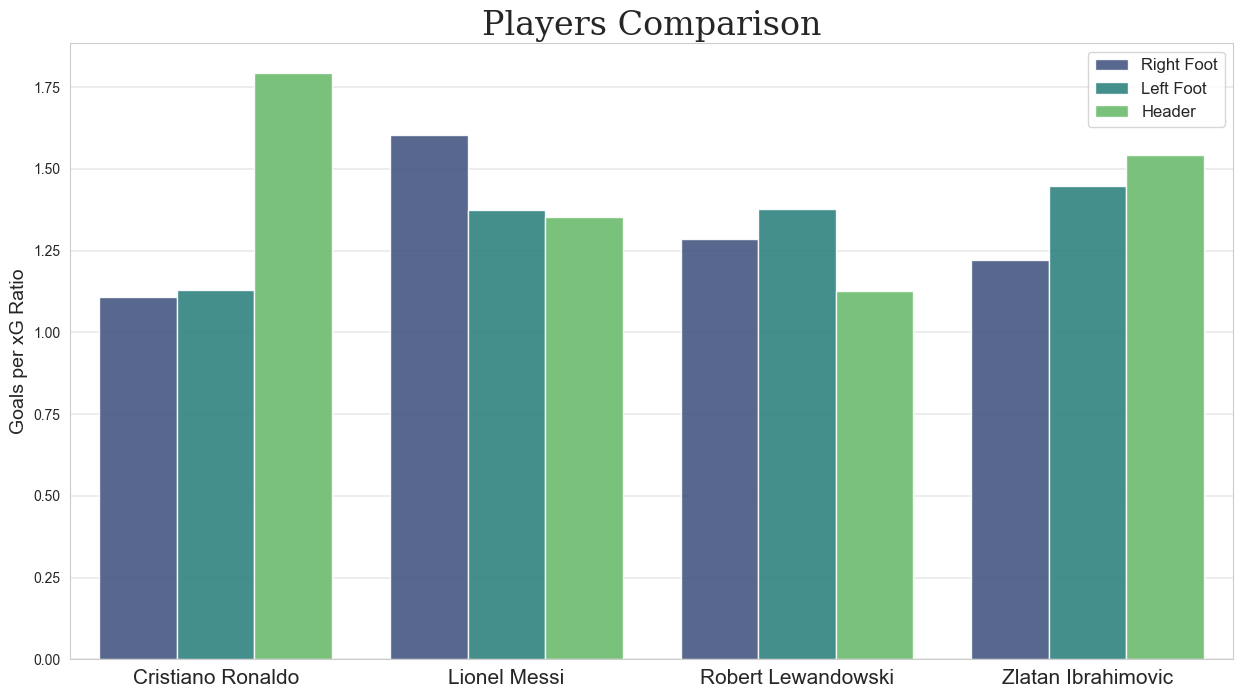

In [80]:
compare_players(players_list = ['Lionel Messi', 'Cristiano Ronaldo', 'Zlatan Ibrahimovic', 'Robert Lewandowski']) 
#몇몇 선수들을 뽑아 그들의 마무리 실력을 신체 각 부분과 비교해보자.
#메시, 크리스티아누 호날두, 즐라탄 이브라히모비치, 로베르트 레반도프스키 등 4명의 최고 선수들을 예로 들어보자.

C:\Users\Owner\AppData\Local\Temp\ipykernel_13720\2208215359.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_foot['bodypart']='Left Foot'
C:\Users\Owner\AppData\Local\Temp\ipykernel_13720\2208215359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headers['bodypart']= 'Header'


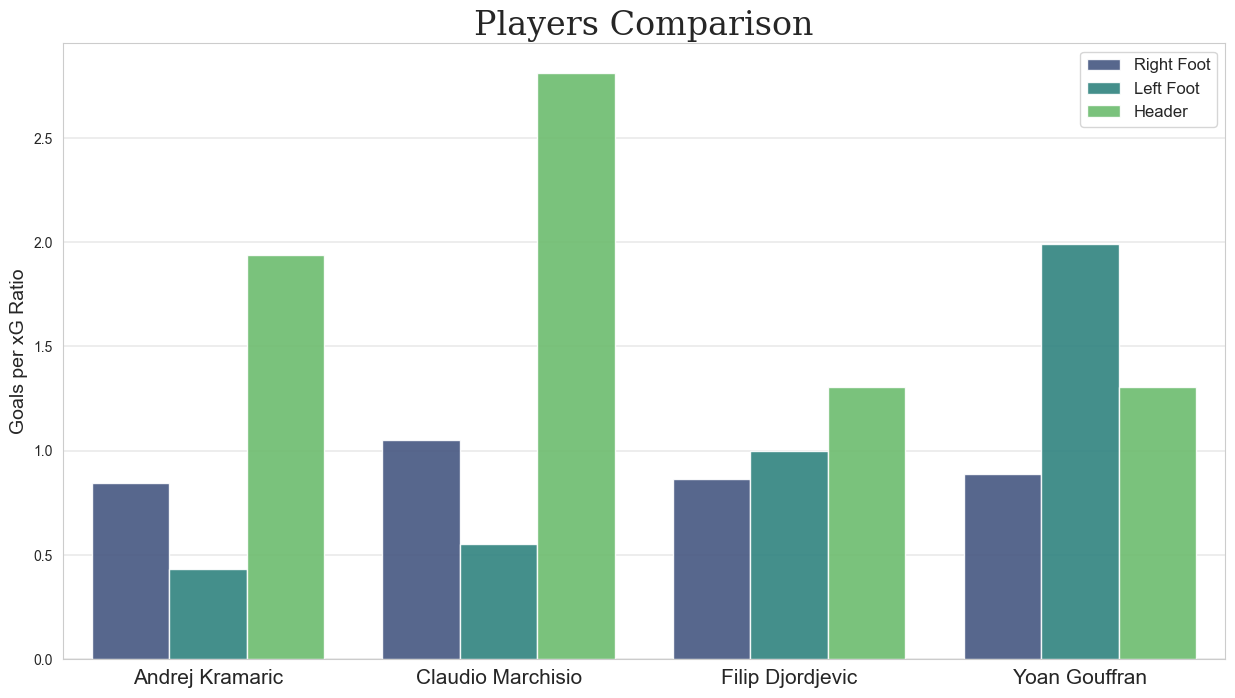

In [81]:
#네 명의 무작위 플레이어를 선택하여 그들을 비교하여 대조를 알아보자.

import random
compare_players(random.sample(all_players_list, 4))

In [82]:
#박스 바깥쪽에서 슛을 날리는 최고의 선수는 누구일까?

outside_box = shots[(shots.location==15)]
outbox_players = outside_box.groupby('player').sum().reset_index()
outbox_players.rename(columns={'event_type': 'n_outbox_shots', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
show = outbox_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'n_outbox_shots', 'trueGoals', 'expectedGoals', 'difference']].head(5)

,rank,player,n_outbox_shots,trueGoals,expectedGoals,difference
0,1,Lionel Messi,304,16,6.396883,-9.603117
1,2,Paul Pogba,226,14,5.993514,-8.006486
2,3,Zlatan Ibrahimovic,261,14,6.780486,-7.219514
3,4,Gonzalo Higuain,127,11,3.861850,-7.138150
4,5,Yaya Toure,128,10,3.380334,-6.619666


In [83]:
show[['rank', 'player', 'n_outbox_shots', 'trueGoals', 'expectedGoals', 'difference']].tail(5)

,rank,player,n_outbox_shots,trueGoals,expectedGoals,difference
4143,4144,Alberto Aquilani,117,0,3.150039,3.150039
4144,4145,Ronny Rodelin,119,0,3.204381,3.204381
4145,4146,Francesco Lodi,170,0,3.444227,3.444227
4146,4147,Alessandro Diamanti,254,3,6.502826,3.502826
4147,4148,Mario Balotelli,209,1,4.745509,3.745509


In [84]:
#마리오 발로텔리와 알레산드로 디아만티와 같은 선수들이 4위 안에 있다. 나잉골란을 최악(4120위)에 포함시켜 이해할 수 없었는데, 나는 나잉골란에 대해 많은 골을 넣은 장거리 슈팅 선수로 기억한다. 하지만 그가 실제로 280개의 슛을 시도했었고 골이 들어갔던 그 때만 기억하기 때문에 그럴 것이다. 이것은 대체로 증명된 심리적 편견이다. 이러한 경우에는, 숫자에 의존하는 것이 좋다.

#다시 한번 Goals/xGoals 비율의 관점에서 최고의 선수들을 보자. 우리는 박스 밖에서 총 80개 이상의 슛을 시도한 선수들만을 고려할 것이다 (1년에 약 12개):

In [85]:
outbox_players['ratio'] = outbox_players['trueGoals'] / outbox_players['expectedGoals']
show = outbox_players[outbox_players['n_outbox_shots']>80].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'n_outbox_shots', 'trueGoals', 'expectedGoals', 'ratio']].head(10)
show.head(5)

,rank,player,n_outbox_shots,trueGoals,expectedGoals,ratio
0,1,James Rodriguez,105,9,2.420249,3.718626
1,2,Alain Traore,86,6,1.831046,3.276816
2,3,Julian Draxler,94,8,2.612672,3.061999
3,4,Alexandre Lacazette,100,9,2.951126,3.049683
4,5,Yaya Toure,128,10,3.380334,2.958288


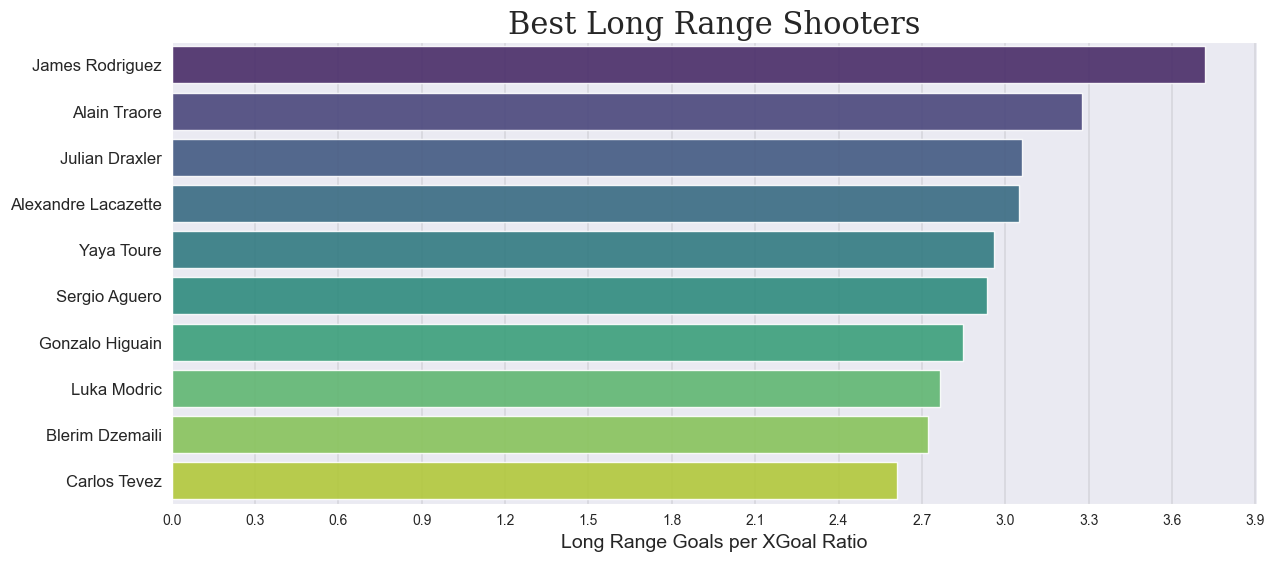

In [86]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[14,6])
ax = sns.barplot(x=show['ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,4,0.3))
ax.set_xlabel(xlabel='Long Range Goals per XGoal Ratio', fontsize=14)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Long Range Shooters", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [87]:
#결과로 보면 하메스 로드리게스가 가장 효율적인 외곽슛을 하는 것 같다...

In [88]:
#어떤 선수가 가장 좋은/가장 위험한 패스를 하는가?

passing = shots[shots.assist_method.isin([1,4])]
passing_players = passing.groupby('player2').sum().reset_index()
passing_players.rename(columns={'player2': 'player', 'event_type': 'n_passes', 'is_goal': 'trueGoals_created', 'prediction': 'expectedGoals_created'}, inplace=True)
show = passing_players.sort_values('expectedGoals_created', ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'n_passes', 'trueGoals_created', 'expectedGoals_created']].head(5)

,rank,player,player,n_passes,trueGoals_created,expectedGoals_created
0,1,Lionel Messi,Alexis SanchezFrancesc FabregasFrancesc Fabreg...,350,68,51.230421
1,2,Mesut Ozil,Karim BenzemaCristiano RonaldoKarim BenzemaCri...,343,35,36.746840
2,3,Cesc Fabregas,Thiago AlcantaraPedroPedroPedroLionel MessiDav...,264,53,36.420739
3,4,Zlatan Ibrahimovic,Alberto AquilaniKevinprince BoatengAntonio Cas...,270,36,36.200329
4,5,Marek Hamsik,Edinson CavaniWalter GarganoEzequiel LavezziCh...,370,50,34.910384


In [89]:
show['xG_perpass'] = show['expectedGoals_created'] / show['n_passes']
show = show[show['n_passes']>80].sort_values('xG_perpass', ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'n_passes', 'xG_perpass']].head(10)
show.head(5)

,rank,player,player,n_passes,xG_perpass
0,1,Luis Suarez,Steven GerrardVictor MosesDaniel SturridgeStev...,185,0.164772
1,2,Gareth Bale,Karim BenzemaCristiano RonaldoCristiano Ronald...,109,0.156303
2,3,Angel Di Maria,Cristiano RonaldoCristiano RonaldoKakaKarim Be...,211,0.151750
3,4,Raul Garcia,DamiaAlvaro CejudoRoland LamahJavad NekounamIb...,90,0.149388
4,5,Lionel Messi,Alexis SanchezFrancesc FabregasFrancesc Fabreg...,350,0.146373
